In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
#Reading the files from our directory
df_bookings=pd.read_csv('datasets/fact_bookings.csv')
df_bookings.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


# 1. Data exploration 

In [108]:
df_bookings.shape

(134590, 12)

In [109]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [110]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [111]:
df_bookings.booking_platform.value_counts()

others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_platform, dtype: int64

<AxesSubplot: >

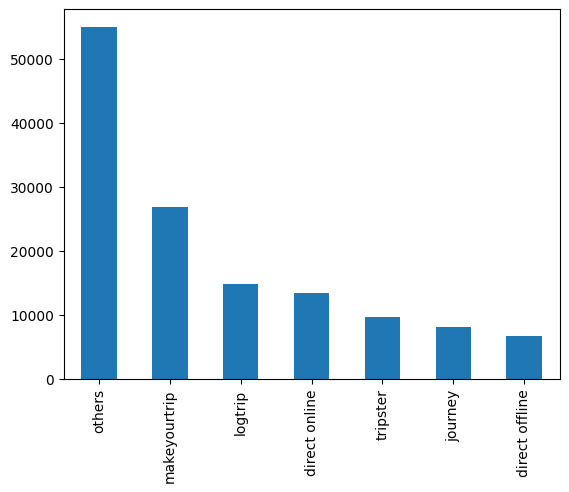

In [112]:
df_bookings.booking_platform.value_counts().plot(kind='bar')

In [113]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [114]:
#reading and exploring the remaining datasets
df_date=pd.read_csv('datasets/dim_date.csv')
df_hotels=pd.read_csv('datasets/dim_hotels.csv')
df_rooms=pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings=pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [115]:
df_hotels.shape

(25, 4)

In [116]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [117]:
df_hotels.category.value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

<AxesSubplot: >

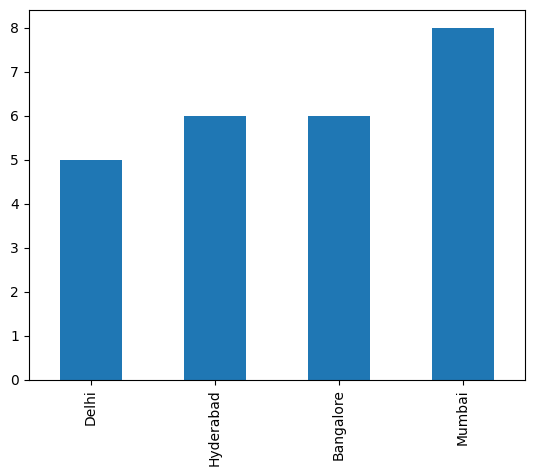

In [118]:
df_hotels.city.value_counts().sort_values().plot(kind='bar')

# 2. Data Cleaning

In [119]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


In [120]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


### Values in "no_guests" column cannot be zero or less. Also, we can see some weird values in "revenue_generated" column.

In [121]:
df_bookings.no_guests.value_counts()

 2.0     60219
 1.0     44311
 3.0     15119
 4.0     12094
 6.0      1444
 5.0      1391
-4.0         2
-3.0         1
-2.0         1
-10.0        1
-12.0        1
-6.0         1
-17.0        1
-1.0         1
Name: no_guests, dtype: int64

In [122]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12-05-2022,12-05-2022,14-05-2022,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,08-05-2022,12-05-2022,14-05-2022,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,05-05-2022,12-05-2022,17-05-2022,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10-05-2022,12-05-2022,17-05-2022,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,05-06-2022,08-06-2022,13-06-2022,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-2022,20-07-2022,22-07-2022,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-2022,31-07-2022,01-08-2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


### Entries in this dataframe has "number of guests" in negative. so lets clean it

In [123]:
df_bookings[df_bookings.no_guests>0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-2022,01-05-2022,06-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-2022,31-07-2022,01-08-2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-2022,31-07-2022,03-08-2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-2022,31-07-2022,02-08-2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-2022,31-07-2022,01-08-2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [124]:
#deleted the rows which had negative values in no_guests column

df_bookings=df_bookings[df_bookings.no_guests>0]
df_bookings.shape

(134578, 12)

In [125]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

#### The number 28560000 is in crore. Also, it cannot be the revenue generated from a single booking in a hotel for a night. So, its definetely some kind of Error.

### To detect outlier and remove them we will use 3 standard deviations. So, Any value which is 3 std away from the mean we will filter those values.

In [126]:
mean, std = df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()

In [127]:
mean, std

(15378.036937686695, 93040.1549314641)

In [128]:
higher_limit= mean + 3*std
higher_limit

294498.50173207896

In [129]:
lower_limit=mean - 3*std
lower_limit

-263742.4278567056

In [130]:
#Checking if there are any values present below the lower limit.
df_bookings[df_bookings.revenue_generated<lower_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [131]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-2022,01-05-2022,02-05-2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-2022,01-05-2022,04-05-2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-2022,28-07-2022,29-07-2022,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


#### These are clearly some data errors. Lets filter them out

In [132]:
df_bookings[df_bookings.revenue_generated<higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-2022,01-05-2022,06-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-2022,01-05-2022,03-05-2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-2022,31-07-2022,01-08-2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-2022,31-07-2022,03-08-2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-2022,31-07-2022,02-08-2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-2022,31-07-2022,01-08-2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [133]:
df_bookings = df_bookings[df_bookings.revenue_generated<higher_limit]
df_bookings.shape

(134573, 12)

In [134]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

### So, again we are doing a standard deviation check on "revenue_realized" column to check if the maximum value of revenue (around 45000) is valid or not.

In [135]:
higher_limit= df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

33479.358661845814

### we have higher limit =33479 and max limit =45220. So, are there any outliers?
#### If we think about it. There are luxury hotels which have higher rent per night. So considering that we will be doing further deviation.

In [136]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-2022,01-05-2022,07-05-2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,01-05-2022,01-05-2022,02-05-2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-2022,01-05-2022,03-05-2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-2022,01-05-2022,07-05-2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-2022,01-05-2022,03-05-2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-2022,31-07-2022,02-08-2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-2022,31-07-2022,01-08-2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-2022,31-07-2022,01-08-2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-2022,31-07-2022,06-08-2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


### One observation here is all bookings greater than higher limit shows room_category as "RT4"

In [137]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


### RT4 = "Presidential suite" is a very expensive type of room which provides high luxury. So, its rent can be 45000 per night

In [138]:
#3 std check just for RT4 rooms
df_bookings[df_bookings.room_category=='RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [139]:
#mean + 3*std
23439 + 3*9048

50583

### So, for RT4 the real ouliers will be any rooms having rent more than 50,000. Hence, we don't have any outliers here. No need of data cleaning 

In [140]:
#checking null values
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

### There are many people who stay in hotels but doesn't give review. So, its okay to have null values in ratings.

In [141]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

# 3. Data Transformation

In [142]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


In [143]:
# Changing datatype of "check_in_date" from object to date for agg_bookings dataset
df_agg_bookings['check_in_date']=pd.to_datetime(df_agg_bookings['check_in_date'])
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   object        
 3   successful_bookings  9200 non-null   int64         
 4   capacity             9198 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 359.5+ KB


In [144]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 13.3+ MB


In [145]:
# Changing datatype of "check_in_date" from object to date for bookings dataset
df_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'])
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 13.3+ MB


C:\Users\sumes\AppData\Local\Temp\ipykernel_12224\1350758293.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'])


In [146]:
# Changing datatype of "checkout_date" from object to date for bookings dataset
df_bookings['checkout_date'] = pd.to_datetime(df_bookings['checkout_date'])
df_bookings.info()

C:\Users\sumes\AppData\Local\Temp\ipykernel_12224\1772040764.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_bookings['checkout_date'] = pd.to_datetime(df_bookings['checkout_date'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  datetime64[ns]
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 13.3+ MB


In [147]:
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30.0
1,19562,2022-05-01,RT1,28,30.0
2,19563,2022-05-01,RT1,23,30.0
3,17558,2022-05-01,RT1,30,19.0
4,16558,2022-05-01,RT1,18,19.0


### In hospitality domain there is concept called "Occupancy Percentage"
### Occupancy% = successful_bookings/capacity

In [148]:
#Making a derived colum occupancy_percentage[occ_pct]
df_agg_bookings['occ_pct'] = df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,2022-05-01,RT1,25,30.0,0.833333
1,19562,2022-05-01,RT1,28,30.0,0.933333
2,19563,2022-05-01,RT1,23,30.0,0.766667
3,17558,2022-05-01,RT1,30,19.0,1.578947
4,16558,2022-05-01,RT1,18,19.0,0.947368


In [149]:
# Formatting the values of occ_pct
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].round(2)
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,2022-05-01,RT1,25,30.0,0.83
1,19562,2022-05-01,RT1,28,30.0,0.93
2,19563,2022-05-01,RT1,23,30.0,0.77
3,17558,2022-05-01,RT1,30,19.0,1.58
4,16558,2022-05-01,RT1,18,19.0,0.95


# 4. Insights Generation

## 1. Whats is the average occupancy rate in each of the categories?

In [150]:
df_agg_bookings.groupby('room_category')['occ_pct'].mean().round(2)

room_category
RT1    0.58
RT2    0.58
RT3    0.58
RT4    0.59
Name: occ_pct, dtype: float64

In [151]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [152]:
df = pd.merge(df_agg_bookings, df_rooms, left_on='room_category', right_on='room_id')
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,2022-05-01,RT1,25,30.0,0.83,RT1,Standard
1,19562,2022-05-01,RT1,28,30.0,0.93,RT1,Standard
2,19563,2022-05-01,RT1,23,30.0,0.77,RT1,Standard
3,17558,2022-05-01,RT1,30,19.0,1.58,RT1,Standard


In [153]:
df.drop('room_id',axis=1, inplace=True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,2022-05-01,RT1,25,30.0,0.83,Standard
1,19562,2022-05-01,RT1,28,30.0,0.93,Standard
2,19563,2022-05-01,RT1,23,30.0,0.77,Standard
3,17558,2022-05-01,RT1,30,19.0,1.58,Standard


In [154]:
df.groupby('room_class')['occ_pct'].mean().round(2).sort_values(ascending=False)

room_class
Presidential    0.59
Elite           0.58
Premium         0.58
Standard        0.58
Name: occ_pct, dtype: float64

## 2. Print average occupancy rate per city ?

In [155]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [156]:
df = pd.merge(df, df_hotels, on='property_id')
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,2022-05-01,RT1,25,30.0,0.83,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2022-05-02,RT1,20,30.0,0.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,2022-05-03,RT1,17,30.0,0.57,Standard,Atliq Exotica,Luxury,Mumbai


In [157]:
df.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        0.62
Hyderabad    0.58
Mumbai       0.58
Bangalore    0.57
Name: occ_pct, dtype: float64

## 3. When was the occupancy better? Weekday or Weekend?

In [158]:
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,2022-05-01,RT1,25,30.0,0.83,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2022-05-02,RT1,20,30.0,0.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,2022-05-03,RT1,17,30.0,0.57,Standard,Atliq Exotica,Luxury,Mumbai


In [159]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May-22,W 19,weekend
1,02-May-22,May-22,W 19,weekeday
2,03-May-22,May-22,W 19,weekeday
3,04-May-22,May-22,W 19,weekeday
4,05-May-22,May-22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul-22,W 31,weekeday
88,28-Jul-22,Jul-22,W 31,weekeday
89,29-Jul-22,Jul-22,W 31,weekeday
90,30-Jul-22,Jul-22,W 31,weekend


In [160]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [161]:
df_date['date'] = pd.to_datetime(df_date['date'])
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [162]:
df = pd.merge(df, df_date, left_on='check_in_date', right_on='date')
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25,30.0,0.83,Standard,Atliq Exotica,Luxury,Mumbai,2022-05-01,May-22,W 19,weekend
1,16559,2022-05-01,RT2,35,41.0,0.85,Elite,Atliq Exotica,Luxury,Mumbai,2022-05-01,May-22,W 19,weekend
2,16559,2022-05-01,RT3,27,32.0,0.84,Premium,Atliq Exotica,Luxury,Mumbai,2022-05-01,May-22,W 19,weekend


In [163]:
df.groupby('day_type')['occ_pct'].mean().round(2)

day_type
weekeday    0.52
weekend     0.74
Name: occ_pct, dtype: float64

## 4. In the month of june, What is the occupancy for different cities?

In [164]:
df_june_22=df[df['mmm yy']=='Jun-22']
df_june_22.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
3100,16559,2022-06-01,RT1,14,30.0,0.47,Standard,Atliq Exotica,Luxury,Mumbai,2022-06-01,Jun-22,W 23,weekeday
3101,16559,2022-06-01,RT2,21,41.0,0.51,Elite,Atliq Exotica,Luxury,Mumbai,2022-06-01,Jun-22,W 23,weekeday
3102,16559,2022-06-01,RT3,15,32.0,0.47,Premium,Atliq Exotica,Luxury,Mumbai,2022-06-01,Jun-22,W 23,weekeday


In [165]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        0.61
Hyderabad    0.58
Mumbai       0.58
Bangalore    0.56
Name: occ_pct, dtype: float64

## The company has provided a new dataset from august month which needs to be appended. So lets do it.

In [166]:
#lets first read the dataset
df_august=pd.read_csv('datasets/new_data_august.csv')
df_august

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [167]:
df_august.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          7 non-null      int64  
 1   property_name        7 non-null      object 
 2   category             7 non-null      object 
 3   city                 7 non-null      object 
 4   room_category        7 non-null      object 
 5   room_class           7 non-null      object 
 6   check_in_date        7 non-null      object 
 7   mmm yy               7 non-null      object 
 8   week no              7 non-null      object 
 9   day_type             7 non-null      object 
 10  successful_bookings  7 non-null      int64  
 11  capacity             7 non-null      int64  
 12  occ%                 7 non-null      float64
dtypes: float64(1), int64(3), object(9)
memory usage: 856.0+ bytes


In [168]:
# Changing the datatype for "check_in_date" column to match it with other datasets.
df_august['check_in_date'] = pd.to_datetime(df_august['check_in_date'])
df_august.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          7 non-null      int64         
 1   property_name        7 non-null      object        
 2   category             7 non-null      object        
 3   city                 7 non-null      object        
 4   room_category        7 non-null      object        
 5   room_class           7 non-null      object        
 6   check_in_date        7 non-null      datetime64[ns]
 7   mmm yy               7 non-null      object        
 8   week no              7 non-null      object        
 9   day_type             7 non-null      object        
 10  successful_bookings  7 non-null      int64         
 11  capacity             7 non-null      int64         
 12  occ%                 7 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64

In [169]:
latest_df=pd.concat([df,df_august], ignore_index=True, axis=0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
9197,18560,2022-07-31,RT2,34,40.0,0.85,Elite,Atliq City,Business,Hyderabad,2022-07-31,Jul-22,W 32,weekend,NaN
9198,18560,2022-07-31,RT3,17,24.0,0.71,Premium,Atliq City,Business,Hyderabad,2022-07-31,Jul-22,W 32,weekend,NaN
9199,18560,2022-07-31,RT4,12,15.0,0.80,Presidential,Atliq City,Business,Hyderabad,2022-07-31,Jul-22,W 32,weekend,NaN
9200,16559,2022-08-01,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaT,Aug-22,W 32,weekeday,100.00
9201,19562,2022-08-01,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaT,Aug-22,W 32,weekeday,70.00
9202,19563,2022-08-01,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaT,Aug-22,W 32,weekeday,76.67
9203,19558,2022-08-01,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaT,Aug-22,W 32,weekeday,75.00
9204,19560,2022-08-01,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaT,Aug-22,W 32,weekeday,76.92
9205,17561,2022-08-01,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaT,Aug-22,W 32,weekeday,69.23
9206,17564,2022-08-01,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaT,Aug-22,W 32,weekeday,62.50


In [170]:
latest_df.shape

(9207, 15)

## 5. Print Revenue realize per city?

In [171]:
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-2022,2022-01-05,2022-02-05,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,2022-01-05,2022-02-05,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,01-05-2022,2022-01-05,2022-03-05,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-2022,2022-01-05,2022-06-05,2.0,RT1,others,NaN,Cancelled,9100,3640


In [172]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [173]:
df_bookings_all=pd.merge(df_bookings, df_hotels, on='property_id')
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-2022,2022-01-05,2022-02-05,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-2022,2022-01-05,2022-02-05,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,01-05-2022,2022-01-05,2022-03-05,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-2022,2022-01-05,2022-06-05,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [174]:
df_bookings_all.groupby('city')['revenue_realized'].sum().sort_values(ascending=False)

city
Mumbai       668569251
Bangalore    420383550
Hyderabad    325179310
Delhi        294404488
Name: revenue_realized, dtype: int64

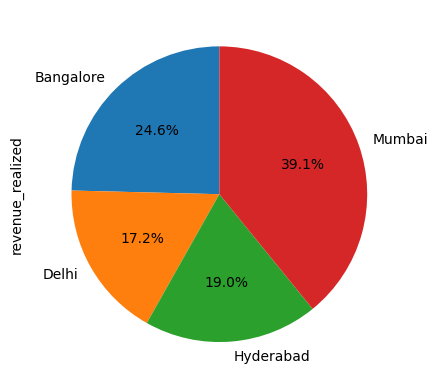

In [175]:
df_bookings_all.groupby('city')['revenue_realized'].sum().plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.show()

## 6. Print month by month revenue?

In [176]:
df_bookings_all.tail(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
134569,Jul312217564RT46,17564,29-07-2022,2022-07-31,2022-03-08,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134570,Jul312217564RT48,17564,30-07-2022,2022-07-31,2022-02-08,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134571,Jul312217564RT49,17564,29-07-2022,2022-07-31,2022-01-08,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134572,Jul312217564RT410,17564,31-07-2022,2022-07-31,2022-01-08,2.0,RT4,makeyourtrip,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai


In [177]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May-22,W 19,weekend
1,2022-05-02,May-22,W 19,weekeday
2,2022-05-03,May-22,W 19,weekeday


In [178]:
df_bookings_all=pd.merge(df_bookings_all,df_date, left_on='check_in_date', right_on='date')
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-2022,2022-05-05,2022-07-05,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May-22,W 19,weekeday
1,May052216558RT12,16558,30-04-2022,2022-05-05,2022-07-05,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May-22,W 19,weekeday
2,May052216558RT13,16558,01-05-2022,2022-05-05,2022-06-05,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May-22,W 19,weekeday
3,May052216558RT14,16558,03-05-2022,2022-05-05,2022-06-05,2.0,RT1,tripster,3.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-05,May-22,W 19,weekeday


In [179]:
df_bookings_all.groupby('mmm yy')['revenue_realized'].sum().sort_values(ascending=False)

mmm yy
May-22    408375641
Jul-22    389940912
Jun-22    377191229
Name: revenue_realized, dtype: int64

<AxesSubplot: ylabel='revenue_realized'>

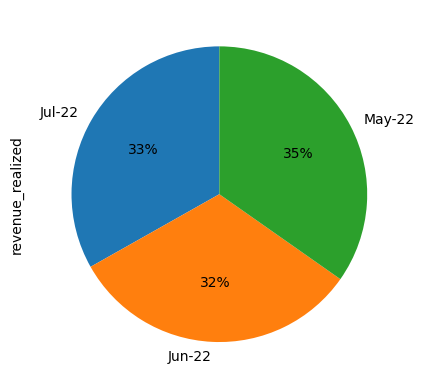

In [180]:
df_bookings_all.groupby('mmm yy')['revenue_realized'].sum().plot(kind='pie', autopct="%1.f%%", startangle=90)